## FE58B Python Programming for Finance Final Exam
##### Mehmet Aksu, 2020703000

### 1. Introduction

Making predictions while trading in electricity markets should be based on quantitative analysis. As the future's supply and demand is not clear, companies support their future trading decisions by analyzing the historical data of the electricity market.

### 2. My Approach

Given data covers today's prices before 12pm as well as historical data. Based on the data we have, I choose a strategy which combines return values of previous day's with todays prices based on two different conditions. 

1. For the orders those are after 12pm, since we only have previous days data, I decided to combine 2 data points which are 24 hours ago and 48 hours ago. While weight of 24 hours ago data point 75%, 48 hours ago have 25%. So the result will be like:
- predicted_return = 0.75*(24_hours_ago) + 0.25*(48_hours_ago)


1. For the orders those are before 12pm, I decided to combine current data point with the 1st approach which generates result like: 
- predicted_return = 0.75*(current_return) + 0.25*(0.75*(24_hours_ago) + 0.25*(48_hours_ago))




### 3. Results

#### Read the data

In [256]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
price_data=pd.read_csv('price_series.csv')

price_data.head()

,date,hour,mcp_try,mcp_usd,mcp_eur,smp_try,usd_try,eur_try,smp_usd,smp_eur
0,2020-01-01,0,311.65,52.46,46.86,261.75,5.940717,6.650662,44.060340,39.356987
1,2020-01-01,1,313.24,52.73,47.10,295.24,5.940451,6.650531,49.699927,44.393449
2,2020-01-01,2,311.08,52.37,46.77,311.08,5.940042,6.651272,52.370000,46.770000
3,2020-01-01,3,310.70,52.30,46.72,310.70,5.940727,6.650257,52.300000,46.720000
4,2020-01-01,4,200.01,33.67,30.07,200.01,5.940303,6.651480,33.670000,30.070000


### Prepare the dataset

In [257]:
# calculate the realized returns in USD
price_data["return"]=price_data["smp_usd"]-price_data["mcp_usd"]

# pick only used columns to make data clear
price_data = price_data[["date","hour","mcp_usd","smp_usd","return"]]

# check if data point is before 12pm or not
price_data['before_12'] = False
price_data.before_12[price_data['hour']<13] = True


# find returns for different dates
after_12_hour_ranges =[24,25,26,27,28,29,30,36]
before_12_hour_ranges = [1,2,3,4,5,6,12]

# set 2 days ago return
price_data['48_hours_ago_return'] = price_data["return"].shift(48)

for hour in before_12_hour_ranges:
    # set return data
    price_data[str(hour) +'_hours_ago_return'] = price_data["return"].shift(hour)

for hour in after_12_hour_ranges:
    # set return data
    price_data[str(hour) +'_hours_ago_return'] = price_data["return"].shift(hour)


price_data.head()

/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/1333182397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data.before_12[price_data['hour']<13] = True


,date,hour,mcp_usd,smp_usd,return,before_12,48_hours_ago_return,1_hours_ago_return,2_hours_ago_return,3_hours_ago_return,...,6_hours_ago_return,12_hours_ago_return,24_hours_ago_return,25_hours_ago_return,26_hours_ago_return,27_hours_ago_return,28_hours_ago_return,29_hours_ago_return,30_hours_ago_return,36_hours_ago_return
0,2020-01-01,0,52.46,44.060340,-8.399660,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,1,52.73,49.699927,-3.030073,True,NaN,-8.399660,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,2,52.37,52.370000,0.000000,True,NaN,-3.030073,-8.399660,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,3,52.30,52.300000,0.000000,True,NaN,0.000000,-3.030073,-8.399660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,4,33.67,33.670000,0.000000,True,NaN,0.000000,0.000000,-3.030073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clear N/A data

In [258]:
price_data_without_na = price_data.copy()

price_data_without_na = price_data.dropna(subset = ['48_hours_ago_return']).copy()

for hour in before_12_hour_ranges:
    price_data_without_na = price_data.dropna(subset = [str(hour)+'_hours_ago_return']).copy()


for hour in after_12_hour_ranges:
    price_data_without_na = price_data.dropna(subset = [str(hour)+'_hours_ago_return']).copy()


price_data_without_na.head()


,date,hour,mcp_usd,smp_usd,return,before_12,48_hours_ago_return,1_hours_ago_return,2_hours_ago_return,3_hours_ago_return,...,6_hours_ago_return,12_hours_ago_return,24_hours_ago_return,25_hours_ago_return,26_hours_ago_return,27_hours_ago_return,28_hours_ago_return,29_hours_ago_return,30_hours_ago_return,36_hours_ago_return
36,2020-01-02,12,54.68,54.68,0.0,True,NaN,0.0,4.252778,8.417966,...,4.208333,0.0,-8.416718,-11.785163,-8.417166,-8.417079,-3.030144,3.365537,3.686787,-8.399660
37,2020-01-02,13,54.79,54.79,0.0,False,NaN,0.0,0.000000,4.252778,...,0.000000,0.0,-9.931894,-8.416718,-11.785163,-8.417166,-8.417079,-3.030144,3.365537,-3.030073
38,2020-01-02,14,55.07,55.07,0.0,False,NaN,0.0,0.000000,0.000000,...,4.315136,0.0,-9.661455,-9.931894,-8.416718,-11.785163,-8.417166,-8.417079,-3.030144,0.000000
39,2020-01-02,15,54.97,54.97,0.0,False,NaN,0.0,0.000000,0.000000,...,8.417966,0.0,-14.478839,-9.661455,-9.931894,-8.416718,-11.785163,-8.417166,-8.417079,0.000000
40,2020-01-02,16,55.35,55.35,0.0,False,NaN,0.0,0.000000,0.000000,...,4.252778,0.0,-9.931852,-14.478839,-9.661455,-9.931894,-8.416718,-11.785163,-8.417166,0.000000


#### Apply the strategies

In [259]:
strategies = [{"name":"mean","function":np.mean},{"name":"median","function":np.median},{"name":"min","function":np.min},{"name":"max","function":np.max}]

for i in strategies:
    price_data_without_na[i["name"]] = i["function"](price_data_without_na[[ str(i)+"_hours_ago_return" for i in after_12_hour_ranges]],axis=1)
    price_data_without_na[i["name"]][price_data['before_12']] =0.75 * price_data_without_na['return'] +  0.25 * i["function"](price_data_without_na[[ str(i)+"_hours_ago_return" for i in before_12_hour_ranges]],axis=1)


price_data_without_na['pred_return'] = 0.75 * price_data_without_na['24_hours_ago_return'] + 0.25 * price_data_without_na['48_hours_ago_return']
price_data_without_na.pred_return[price_data['before_12']] =0.75 * price_data_without_na['return'] +  0.25 * price_data_without_na['pred_return'] 
price_data_without_na

/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/4196106672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data_without_na[i["name"]][price_data['before_12']] =0.75 * price_data_without_na['return'] +  0.25 * i["function"](price_data_without_na[[ str(i)+"_hours_ago_return" for i in before_12_hour_ranges]],axis=1)
/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/4196106672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data_without_na[i["name"]][price_data['before_12']] =0.75 * price_data_without_na['return'] +  0.25 * i["function"](price_data_without_na[[ str(i)+"_h

,date,hour,mcp_usd,smp_usd,return,before_12,48_hours_ago_return,1_hours_ago_return,2_hours_ago_return,3_hours_ago_return,...,27_hours_ago_return,28_hours_ago_return,29_hours_ago_return,30_hours_ago_return,36_hours_ago_return,mean,median,min,max,pred_return
36,2020-01-02,12,54.68,54.68,0.0,True,NaN,0.0,4.252778,8.417966,...,-8.417079,-3.030144,3.365537,3.686787,-8.399660,0.756936,1.052083,0.000000,2.104491,NaN
37,2020-01-02,13,54.79,54.79,0.0,False,NaN,0.0,0.000000,4.252778,...,-8.417166,-8.417079,-3.030144,3.365537,-3.030073,-6.207838,-8.416898,-11.785163,3.365537,NaN
38,2020-01-02,14,55.07,55.07,0.0,False,NaN,0.0,0.000000,0.000000,...,-11.785163,-8.417166,-8.417079,-3.030144,0.000000,-7.457453,-8.417123,-11.785163,0.000000,NaN
39,2020-01-02,15,54.97,54.97,0.0,False,NaN,0.0,0.000000,0.000000,...,-8.416718,-11.785163,-8.417166,-8.417079,0.000000,-8.888539,-9.039311,-14.478839,0.000000,NaN
40,2020-01-02,16,55.35,55.35,0.0,False,NaN,0.0,0.000000,0.000000,...,-9.931894,-8.416718,-11.785163,-8.417166,0.000000,-9.077886,-9.796654,-14.478839,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,2022-01-22,15,100.05,100.05,0.0,False,6.516008,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,22.108823,2.763603,0.000000,0.000000,22.108823,1.629002
18064,2022-01-22,16,100.05,100.05,0.0,False,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,11.422902,1.427863,0.000000,0.000000,11.422902,0.000000
18065,2022-01-22,17,100.05,100.05,0.0,False,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.421492,2.302687,0.000000,0.000000,18.421492,0.000000
18066,2022-01-22,18,100.05,100.05,0.0,False,7.877983,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.526823,3.190853,0.000000,0.000000,25.526823,1.969496


#### Get decisions

In [260]:
# make decisions
# make every decision do nothing first
price_data_without_na['action'] = "do nothing"
price_data_without_na['action'][price_data_without_na["pred_return"]>0] = "buy"


# make every trade amount 0 units first
price_data_without_na['action_units'] = 0
price_data_without_na['action_units'][price_data_without_na['action']=='buy'] = 1

for i in strategies:
    # make decisions
    # make every decision do nothing first
    price_data_without_na[i["name"]+'action'] = "do nothing"
    price_data_without_na[i["name"]+'action'][price_data_without_na[i["name"]]>0] = "buy"

    # make every trade amount 0 units first
    price_data_without_na[i["name"]+'action_units'] = 0
    price_data_without_na[i["name"]+'action_units'][price_data_without_na[i["name"]+'action']=='buy'] = 1

price_data_without_na.head()


/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/461314339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data_without_na['action'][price_data_without_na["pred_return"]>0] = "buy"
/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/461314339.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data_without_na['action_units'][price_data_without_na['action']=='buy'] = 1
/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/461314339.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

,date,hour,mcp_usd,smp_usd,return,before_12,48_hours_ago_return,1_hours_ago_return,2_hours_ago_return,3_hours_ago_return,...,action,action_units,meanaction,meanaction_units,medianaction,medianaction_units,minaction,minaction_units,maxaction,maxaction_units
36,2020-01-02,12,54.68,54.68,0.0,True,NaN,0.0,4.252778,8.417966,...,do nothing,0,buy,1,buy,1,do nothing,0,buy,1
37,2020-01-02,13,54.79,54.79,0.0,False,NaN,0.0,0.000000,4.252778,...,do nothing,0,do nothing,0,do nothing,0,do nothing,0,buy,1
38,2020-01-02,14,55.07,55.07,0.0,False,NaN,0.0,0.000000,0.000000,...,do nothing,0,do nothing,0,do nothing,0,do nothing,0,do nothing,0
39,2020-01-02,15,54.97,54.97,0.0,False,NaN,0.0,0.000000,0.000000,...,do nothing,0,do nothing,0,do nothing,0,do nothing,0,do nothing,0
40,2020-01-02,16,55.35,55.35,0.0,False,NaN,0.0,0.000000,0.000000,...,do nothing,0,do nothing,0,do nothing,0,do nothing,0,do nothing,0


#### Get summaries

In [261]:
price_data_without_na["trading_return"] = price_data_without_na['action_units'] * price_data_without_na['return']


summary_table = pd.pivot_table(price_data_without_na, values=['trading_return'],
                    columns=['action'], aggfunc=[np.mean,np.sum,len])


summary_table
print(summary_table)
for i in strategies:
    price_data_without_na[i["name"]]


    price_data_without_na[i["name"]+"trading_return"] = price_data_without_na[i["name"]+'action_units'] * price_data_without_na['return']


    summary_table = pd.pivot_table(price_data_without_na, values=[i["name"]+'trading_return',i["name"]+'action_units'],
                        columns=[i["name"]+'action'], aggfunc=[np.mean,np.sum,len])


    # summary table with the number of bought and not bought operations
    print(summary_table)


                    mean                      sum              len           
action               buy do nothing           buy do nothing   buy do nothing
trading_return  2.777069        0.0  25635.122214        0.0  9231       8767
                        mean                      sum              len  \
meanaction               buy do nothing           buy do nothing   buy   
meanaction_units    1.000000        0.0   9301.000000        0.0  9301   
meantrading_return  2.537381        0.0  23600.182834        0.0  9301   

                               
meanaction         do nothing  
meanaction_units         8697  
meantrading_return       8697  
                          mean                      sum              len  \
medianaction               buy do nothing           buy do nothing   buy   
medianaction_units    1.000000        0.0   8814.000000        0.0  8814   
mediantrading_return  2.733738        0.0  24095.163173        0.0  8814   

                                 
me

#### Given example strategy with summaries table

In [262]:
# shift data by 168 hours (7*24)
price_data["last_week_return"] = price_data["return"].shift(168)
full_price_data = price_data.dropna(subset = ['last_week_return']).copy()
# make decisions
# make every decision do nothing first
full_price_data['action'] = "do nothing"
full_price_data.action[full_price_data['last_week_return']>0] = "buy"

# make every trade amount 0 units first
full_price_data['action_units'] = 0
full_price_data.action_units[full_price_data['action']=='buy'] = 1

# calculate hourly returns
full_price_data["trading_return"] = full_price_data['action_units'] * full_price_data['return']

full_price_data.head(10)

# this calculates the stats from the beginning
summary_table = pd.pivot_table(full_price_data, values=['trading_return','action_units'],
                    columns=['action'], aggfunc=[np.mean,np.sum,len])
summary_table

/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/1612354721.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_price_data.action[full_price_data['last_week_return']>0] = "buy"
/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/1612354721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_price_data.action_units[full_price_data['action']=='buy'] = 1


mean                     sum              len           
action              buy do nothing          buy do nothing   buy do nothing
action_units    1.00000        0.0  8070.000000        0.0  8070       9796
trading_return -0.26798        0.0 -2160.183041        0.0  8070       9796

### 4. Conclusion

#### Comparing the strategies

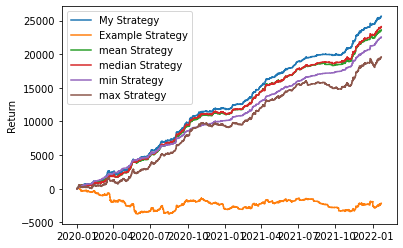

In [263]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

y=price_data_without_na["trading_return"].cumsum()
given_y=full_price_data["trading_return"].cumsum()
x=pd.to_datetime(price_data_without_na["date"])
given_x=pd.to_datetime(full_price_data["date"])
plt.ylabel("Return")
plt.plot(x,y,label = "My Strategy")
plt.plot(given_x,given_y,label = "Example Strategy")

for strategy in strategies:
    temp_y = price_data_without_na[strategy["name"]+"trading_return"].cumsum()
    plt.plot(x,temp_y,label = strategy["name"] + " Strategy")
plt.legend()
plt.show()


#### Outcomes

In [264]:
my_strategy_mean=(np.mean(price_data_without_na["trading_return"])).round(4)
example_strategy_mean=(np.mean(full_price_data["trading_return"])).round(4)

my_strategy_buy_count = len(price_data_without_na[price_data_without_na['action_units']==1])
example_strategy_buy_count = len(full_price_data[full_price_data['action_units']==1])
print(f'While average return of my strategy is {my_strategy_mean}, given strategy have mean of {example_strategy_mean}')
print(f'While count of buy decisions with my strategy is {my_strategy_buy_count}, given strategy have total buy count of {example_strategy_buy_count}')
print("Although my strategy generates profit, standard deviation of historical data can be used to improve the strategy!")

While average return of my strategy is 1.427, given strategy have mean of -0.1211
While count of buy decisions with my strategy is 9231, given strategy have total buy count of 8070
Although my strategy generates profit, standard deviation of historical data can be used to improve the strategy!


In [265]:
price_data_without_na['pred_return'] = 0.75 * price_data_without_na['24_hours_ago_return'] + 0.25 * price_data_without_na['48_hours_ago_return']
price_data_without_na.pred_return[price_data['before_12']] =price_data_without_na['return'] 


price_data_without_na["after_std"] = np.std(price_data_without_na[[ str(i)+"_hours_ago_return" for i in after_12_hour_ranges]],axis=1)
price_data_without_na["before_std"] = np.std(price_data_without_na[[ str(i)+"_hours_ago_return" for i in before_12_hour_ranges]],axis=1)


# make decisions
# make every decision do nothing first
price_data_without_na['action'] = "do nothing"
price_data_without_na['action'][(price_data_without_na["pred_return"]>0) &( price_data_without_na["after_std"] > price_data_without_na["before_std"]  )] = "buy"




# make every trade amount 0 units first
price_data_without_na['action_units'] = 0
price_data_without_na['action_units'][price_data_without_na['action']=='buy'] = 1

price_data_without_na["trading_return_improved"] = price_data_without_na['action_units'] * price_data_without_na['return']


summary_table = pd.pivot_table(price_data_without_na, values=['trading_return_improved','action_units'],
                    columns=['action'], aggfunc=[np.mean,np.sum,len])



/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/56925639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data_without_na.pred_return[price_data['before_12']] =price_data_without_na['return']
/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/56925639.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data_without_na['action'][(price_data_without_na["pred_return"]>0) &( price_data_without_na["after_std"] > price_data_without_na["before_std"]  )] = "buy"
/var/folders/z8/kb8dkvt56qdb3qh2x72v5nrm0000gn/T/ipykernel_71102/56925639.py:19: SettingWithCopyWarning: 
A value is try

In [266]:
summary_table = pd.pivot_table(price_data_without_na, values=['trading_return_improved','action_units'],
                    columns=['action'], aggfunc=[np.mean,np.sum,len])
summary_table

mean                      sum              len  \
action                        buy do nothing           buy do nothing   buy   
action_units             1.000000        0.0   4525.000000        0.0  4525   
trading_return_improved  3.701392        0.0  16748.799685        0.0  4525   

                                    
action                  do nothing  
action_units                 13473  
trading_return_improved      13473

### Improved Strategy

I first tried different strategies such as mean,max,median and min of last 6 hours of now and last 6 hours of yesterday values to predict new return values. When i compare this mix of strategies i realized that my first strategy is still better than all of this. And the reason for that is first strategy of mine is based on the hours of the day rather than continuous hour series. So i though that i can mix this strategy with the other ones and improve the return. As improved strategy i am buying if and only if return is greater than zero while standard deviation of nearest hours is less than standard deviation of last 24-30 hours. And with the help of this comparison mean of my return increased to 3.70 from 2.77